# Name: D. Lasya Priya

## GRIP FEB 22

## Data Science Intern

## TASK 2 - Prediction Using Unsupervised ML

###   
## Importing the dataset and obtaining its basic description

In [1]:
import pandas as pd
path = 'C:/Users/Dell/Desktop/My StUFf/TSF/task2/Iris.csv'
data = pd.read_csv(path)

In [2]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Importing important libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

##    
## We use the 'elbow method' to predict the optimum clusters. The point where the elbow occurs is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. 

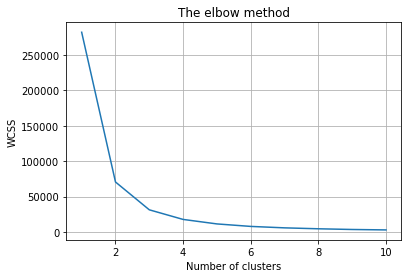

In [6]:
# Finding the optimum number of clusters for k-means classification

x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

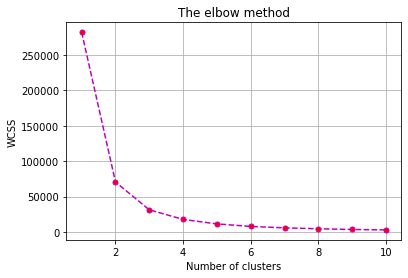

In [7]:
plt.plot(range(1, 11), wcss,'m--',marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

In [8]:
print(wcss)

[281831.54466666654, 70581.3808, 31320.711199999994, 17762.657226173542, 11423.238080088988, 7909.5306730769225, 5881.448116883118, 4562.780079365082, 3579.7205612745106, 2968.4914326653743]


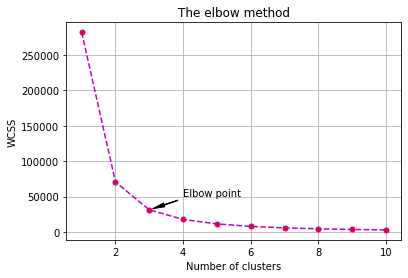

In [9]:
plt.plot(range(1, 11), wcss,'m--',marker = 'o', markerfacecolor = 'red', markersize = 5)

label_x = 4
label_y = 50000
arrow_x = 3
arrow_y = 31320.711199999994
arrow_properties = dict(facecolor="black", width=0.5, headwidth=4, shrink=0.1)
plt.annotate("Elbow point", xy=(arrow_x, arrow_y), xytext=(label_x, label_y), arrowprops=arrow_properties)

plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

## From the above graph, we see that the point from which the graph starts to look almost parallel to the x axis corresponds to the value 3 for "Number of clusters".
##    

In [10]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 1, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Scatter plot to see the basic distribution of the dataset

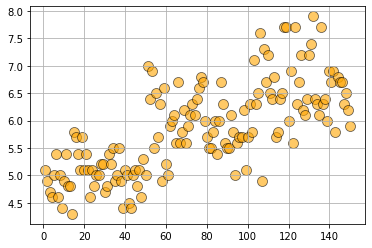

In [11]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], linewidths = 0.8, edgecolor ="black", alpha = 0.6,
            s = 100, c = 'orange')
plt.grid()

In [12]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

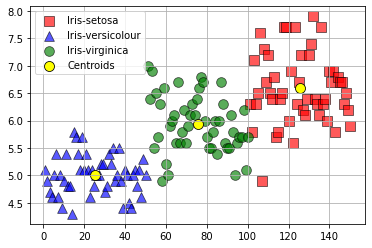

In [13]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], marker = 's', linewidths = 0.8, edgecolor ="black", alpha = 0.65,
            s = 90, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], marker = '^', linewidths = 0.8, edgecolor ="black", alpha = 0.65,
            s = 95, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], linewidths = 0.8, edgecolor ="black", alpha = 0.65,
            s = 95, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], linewidths = 0.8, edgecolor ="black",
            s = 100, c = 'yellow', label = 'Centroids')
plt.grid()
plt.legend()

## From the above plotted graph, we can differentiate all the clusters as they have been marked by different clours and symbols. The yellow point in the center shows the centroid of each cluster.
##      

## Comparison of both plots to show the formation of clusters

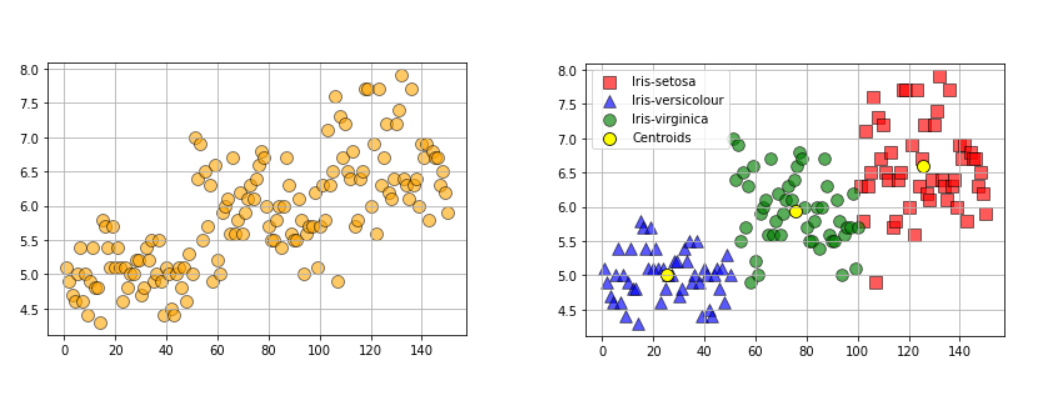

## Plotting 2 and 4 cluster scatter plots aswell to notice the variation

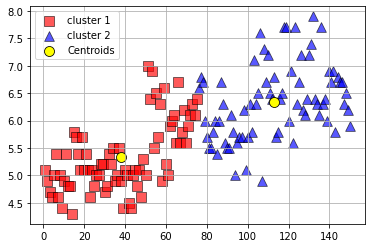

In [24]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], marker = 's', linewidths = 0.8, edgecolor ="black", alpha = 0.65,
            s = 90, c = 'red', label = 'cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], marker = '^', linewidths = 0.8, edgecolor ="black", alpha = 0.65,
            s = 95, c = 'blue', label = 'cluster 2')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], linewidths = 0.8, edgecolor ="black",
            s = 100, c = 'yellow', label = 'Centroids')
plt.grid()
plt.legend()

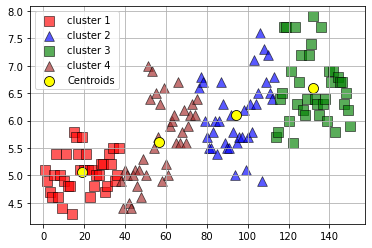

In [25]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], marker = 's', linewidths = 0.8, edgecolor ="black", alpha = 0.65,
            s = 90, c = 'red', label = 'cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], marker = '^', linewidths = 0.8, edgecolor ="black", alpha = 0.65,
            s = 95, c = 'blue', label = 'cluster 2')
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], marker = 's', linewidths = 0.8, edgecolor ="black", alpha = 0.65,
            s = 90, c = 'green', label = 'cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], marker = '^', linewidths = 0.8, edgecolor ="black", alpha = 0.65,
            s = 95, c = 'brown', label = 'cluster 4')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], linewidths = 0.8, edgecolor ="black",
            s = 100, c = 'yellow', label = 'Centroids')
plt.grid()
plt.legend()

## Comparison of all the above plots to show the formation of clusters for different k values

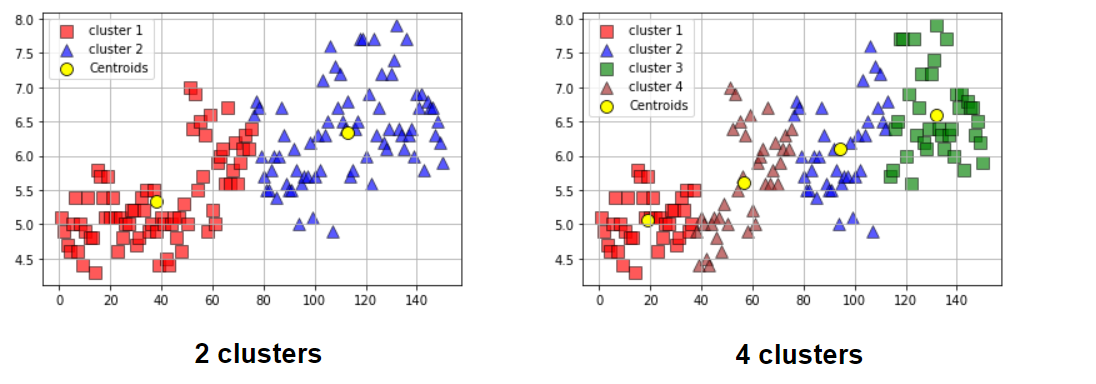

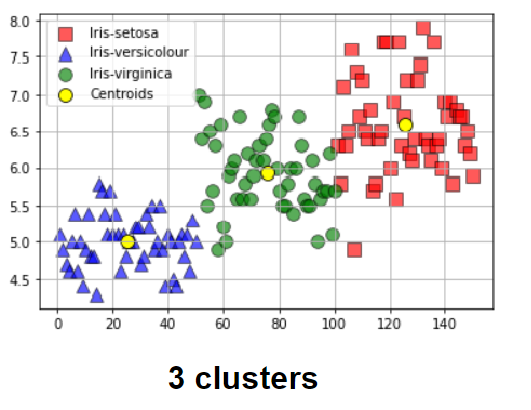

# On finally comparing these to 3 clusters, we see that the clusters look more well defined when we considered k = 3

# Therefore, the optimum k value is 3

# THANK YOU! :)

#    